<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#导入相关库" data-toc-modified-id="导入相关库-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>导入相关库</a></span></li></ul></div>

In [1]:
import pandas as pd

In [2]:
data_dir = {
    'train_data': './handWriting/train/',
    'test_data': './handWriting/test/',
    'train_label': './handWriting/train.csv'
}

kk = pd.read_csv(data_dir['train_label'])

# 导入相关库

In [3]:
import os
from glob import glob
import torch as t
from PIL import Image
import torch.nn as nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.utils import save_image, make_grid
from torch.optim import SGD
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts, MultiStepLR
from torch.utils.data import DataLoader, Dataset, WeightedRandomSampler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patch 
import torch.nn.functional as F
import json
from torchvision.models.mobilenet import MobileNetV2
from torchvision.models.resnet import resnet50, resnet34
from torchsummary import summary

%matplotlib inline

In [4]:
def data_summary():
    train_list = glob(data_dir['train_data']+'*.jpg')
    train_list.sort(key= lambda x: int(x.split('.')[1][19:]))
    test_list = glob(data_dir['test_data']+'*.jpg')
    print('train image counts: %d'%len(train_list))
    print('test image counts: %d'%len(test_list))

data_summary()

train image counts: 372331
test image counts: 41370


In [5]:
labels = pd.read_csv(data_dir['train_label']).label.tolist()
print(labels[2])

BENES


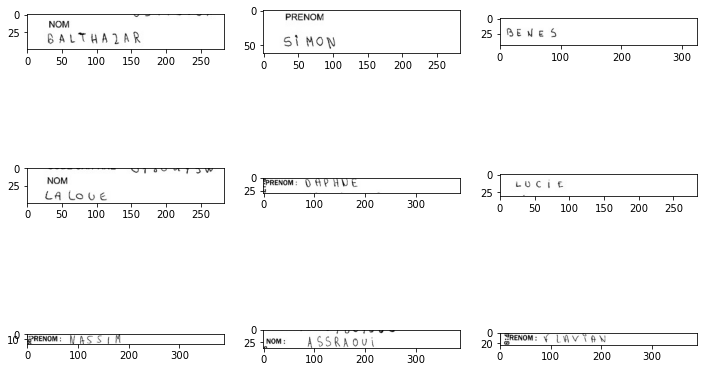

In [6]:
def plot_samples():
    imgs = glob(data_dir['train_data']+'*.jpg')
    imgs.sort(key= lambda x: int(x.split('.')[1][19:]))
    fig, ax = plt.subplots(figsize=(12, 8), ncols=3, nrows=3)
    labels = pd.read_csv(data_dir['train_label']).label.tolist()


    for i in range(9):
        label = labels[i]
        img = Image.open(imgs[i])
        img = np.array(img)
        ax[i//3, i%3].imshow(img)
    plt.show()

plot_samples()

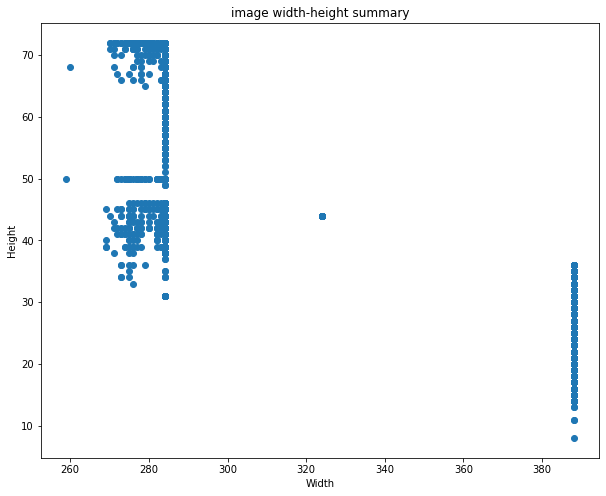

In [7]:
def img_size_summary():
    sizes = []

    for img in glob(data_dir['train_data']+'*.jpg'):
      img = Image.open(img)
      sizes.append(img.size)

    sizes = np.array(sizes)

    plt.figure(figsize=(10, 8))
    plt.scatter(sizes[:, 0], sizes[:, 1])
    plt.xlabel('Width')
    plt.ylabel('Height')
  
    plt.title('image width-height summary')
    plt.show()

img_size_summary()

1个数字的图片数目: 139
2个数字的图片数目: 497
3个数字的图片数目: 10873
4个数字的图片数目: 35994
5个数字的图片数目: 71442
6个数字的图片数目: 87211
7个数字的图片数目: 74128
8个数字的图片数目: 44120
9个数字的图片数目: 22645
10个数字的图片数目: 9415
11个数字的图片数目: 4582
12个数字的图片数目: 2934
13个数字的图片数目: 2349
14个数字的图片数目: 2048
15个数字的图片数目: 1636
16个数字的图片数目: 1364
17个数字的图片数目: 575
18个数字的图片数目: 247
19个数字的图片数目: 99
20个数字的图片数目: 12
21个数字的图片数目: 12
22个数字的图片数目: 5
23个数字的图片数目: 2
24个数字的图片数目: 1
34个数字的图片数目: 1


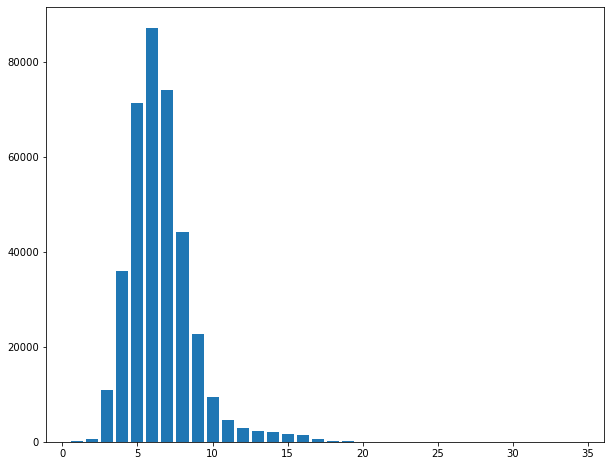

In [8]:
from collections import defaultdict
def label_summary():
    labels = pd.read_csv(data_dir['train_label']).label.tolist()
    dicts = defaultdict(int)
    for label in labels:
        dicts[len(str(label))] += 1
    dicts = sorted(dicts.items(), key=lambda x: x[0])
    for k, v in dicts:
        print('%d个数字的图片数目: %d'%(k, v))
    fig, ax = plt.subplots(figsize=(10, 8))
    xx = list(dict(dicts).keys())
    yy = list(dict(dicts).values())
    plt.bar(xx, yy)

label_summary()

In [62]:
labels = pd.read_csv(data_dir['train_label']).label.tolist()
show_label = labels[:10]
for i in show_label:
    kk = []
    for j in i:
        kk.append(ord(j))
    print(kk)

[66, 65, 76, 84, 72, 65, 90, 65, 82]
[83, 73, 77, 79, 78]
[66, 69, 78, 69, 83]
[76, 65, 32, 76, 79, 86, 69]
[68, 65, 80, 72, 78, 69]
[76, 85, 67, 73, 69]
[78, 65, 83, 83, 73, 77]
[65, 83, 83, 82, 65, 79, 85, 73]
[76, 65, 86, 73, 65, 78]
[77, 65, 69, 86, 65]


In [ ]:
import torch
import pandas as pd
from collections import defaultdict

train_df = pd.read_csv('./handWriting/train.csv')
train_df.dropna(axis=0, how='any',inplace=True)
label = train_df.label.tolist()
label_count = defaultdict(int)
for index,i in enumerate(label):
    for j in i:
        if ord(j) < 65:
            label_count[j] += 1
print(label_count)
jl = {' ': 11650, '-': 7438, "'": 279}
for k in jl:
    print(k,ord(k))
file_names = train_df.filename.tolist()
kk = zip(file_names[1900:2000],label[1900:2000])
print(list(kk))


# train_df = pd.read_csv('./handWriting/train.csv')
# # print(len(train_df))
# train_df.dropna(axis=0,how='any',inplace=True)
# files = train_df.filename
# labels = train_df.label.tolist()
# images_path = ["./handWriting/train/"+ str(i) + '.jpg' for i in files]
